In [1]:
# data from https://www.kaggle.com/uciml/sms-spam-collection-dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn import ensemble


spam = pd.read_csv('spam.csv')
spam = spam.rename(columns={'v1': 'target'})
spam

,target,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
# No columns were dropped. Investigating further

spam = spam.dropna(axis=1, how='all')
spam.head()

,target,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Looks like the other columns have some words. Let's concatenate into one column 

spam[spam['Unnamed: 2'].notna()].head()

,target,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [4]:
text_cols = ['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

spam[text_cols] = spam[text_cols].fillna('')
spam

,target,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,,,
5568,ham,Will �_ b going to esplanade fr home?,,,
5569,ham,"Pity, * was in mood for that. So...any other s...",,,
5570,ham,The guy did some bitching but I acted like i'd...,,,


In [5]:
spam['text'] = spam[text_cols].agg(' '.join, axis=1)
spam = spam.drop(text_cols, axis=1)
spam

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:>

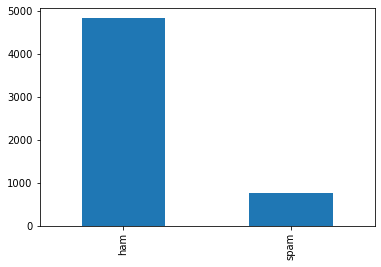

In [6]:
spam['target'].value_counts().plot(kind='bar')

In [7]:
spam['target'] = spam['target'].map({'ham': 0, 'spam': 1})

In [8]:
spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
X = spam['text']
y = spam['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

In [11]:
vectorizer = CountVectorizer(
    max_features=200,
    ngram_range=(1,1),
    strip_accents='unicode',
    stop_words='english',
    binary=True
    )

In [12]:
X_train

4912    Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...
2541    I dont. Can you send it to me. Plus how's mode...
5323                        Aah bless! How's your arm?   
5171                      Oh k. . I will come tomorrow   
2532                                         Yup ok...   
                              ...                        
3185    Happy birthday to you....dear.with lots of lov...
607     what I meant to say is cant wait to see u agai...
552     Sure, if I get an acknowledgement from you tha...
763     Nothing but we jus tot u would ask cos u ba gu...
3393    Bull. Your plan was to go floating off to IKEA...
Name: text, Length: 3900, dtype: object

In [13]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

X_train = pd.DataFrame(X_train.todense(),columns=vectorizer.get_feature_names())
X_test = pd.DataFrame(X_test.todense(), columns=vectorizer.get_feature_names())

In [14]:
X_test

,10,100,150p,16,18,50,500,account,aight,amp,...,wish,won,work,world,www,ya,yeah,year,yes,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1669,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
clr = ensemble.RandomForestClassifier(n_estimators=1000, random_state=1)

In [16]:
clr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [40]:
prediction = clr.predict(X_test)

In [18]:
metrics.accuracy_score(y_test, prediction)

0.9677033492822966

In [19]:
matrix = metrics.confusion_matrix(y_test, prediction)
matrix

array([[1430,   18],
       [  36,  188]], dtype=int64)

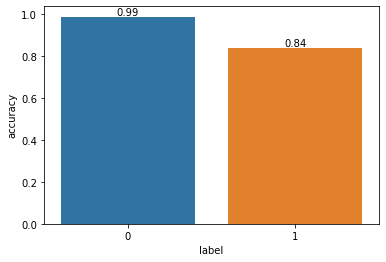

In [20]:
accuracies = zip(range(0,10), matrix.diagonal()/matrix.sum(axis=1))
acc_df = pd.DataFrame([i for i in accuracies], columns=['label', 'accuracy'])

labels = acc_df['label']
values = acc_df['accuracy']

ax = sns.barplot(x=labels, y=values)

for p in ax.patches:
             ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.show()

In [21]:
word_importances = pd.DataFrame({
    'words': vectorizer.get_feature_names(),
    'importance': clr.feature_importances_
})

top_words = word_importances.sort_values('importance', ascending=True).tail(20)

top_words

,words,importance
3,16,0.013448
6,500,0.014055
35,customer,0.014170
189,win,0.014912
4,18,0.014944
27,com,0.015883
177,urgent,0.016586
5,50,0.017470
156,text,0.018025
136,reply,0.024533


In [22]:
import numpy as np

def spam_detector(message):
    tdm = vectorizer.transform(np.array([message]))
    prob_spam = clr.predict_proba(tdm)[:, 1]
    return prob_spam

In [33]:
spam_detector("Hey I'll be home soon")

array([0.])

In [39]:
spam_detector("txt back to win free money")

array([0.878])